In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


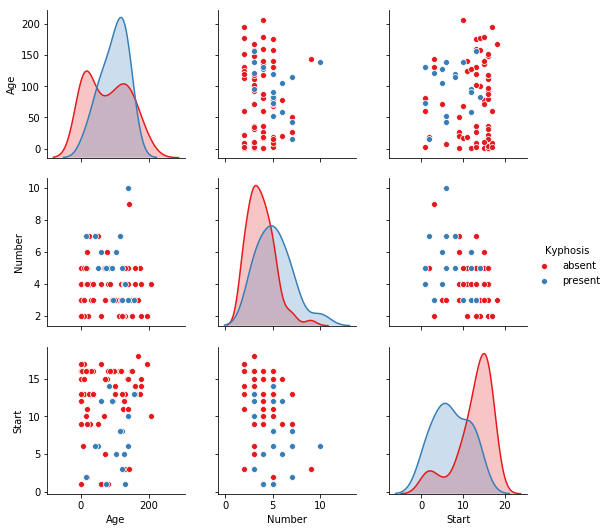

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [5]:
X=df.drop('Kyphosis',axis=1)

In [6]:
y=df['Kyphosis']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.33)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree=DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
predictions=dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  2]
 [ 3  3]]
              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.60      0.50      0.55         6

    accuracy                           0.81        27
   macro avg       0.73      0.70      0.71        27
weighted avg       0.81      0.81      0.81        27



In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc=RandomForestClassifier(n_estimators=200)

In [17]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rfc_pre=rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pre))
print(classification_report(y_test,rfc_pre))

[[20  1]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.83      0.95      0.89        21
     present       0.67      0.33      0.44         6

    accuracy                           0.81        27
   macro avg       0.75      0.64      0.67        27
weighted avg       0.80      0.81      0.79        27



In [21]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

C:\Users\Mohamed\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Age', 'Number', 'Start']

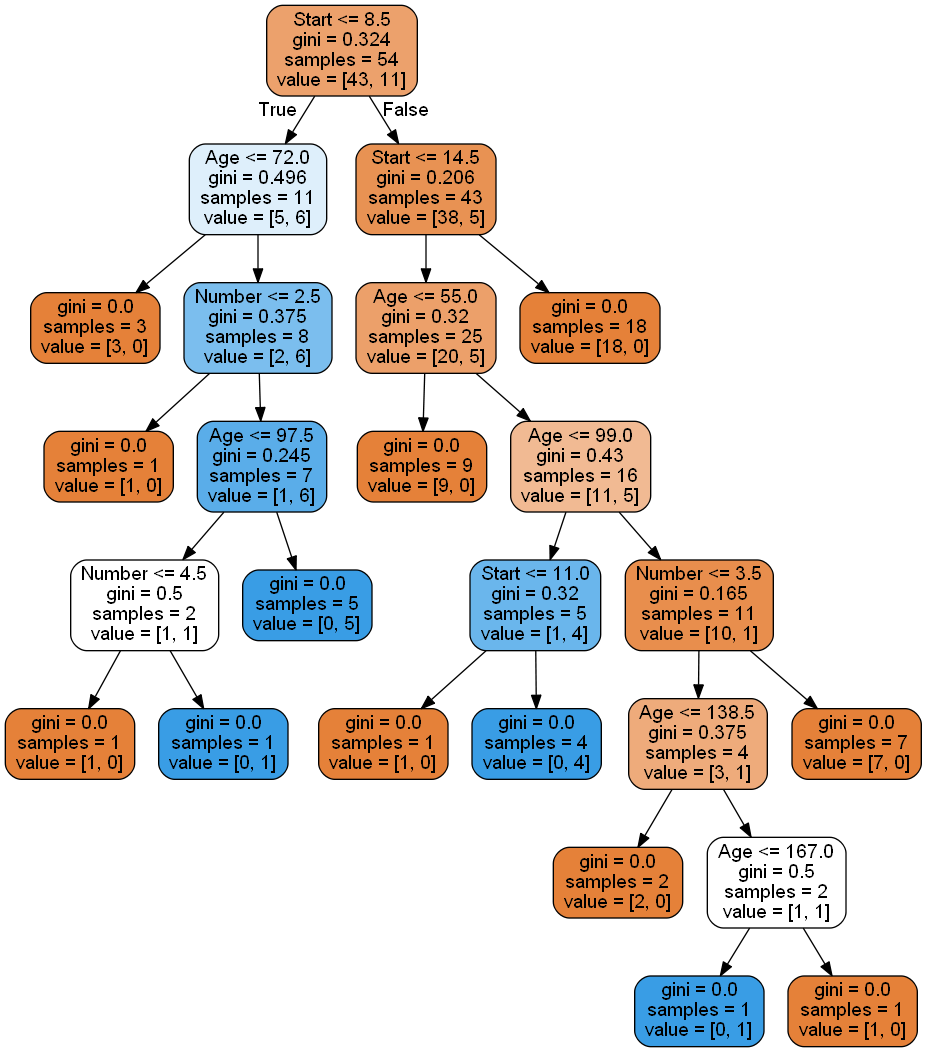

In [22]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [ ]:
ss